# Project : Cardiovascular Risk Factor Data

## About Dataset

- DataSet is taken from Kaggle - https://www.kaggle.com/datasets/mamta1999/cardiovascular-risk-data 
- DataSet provided information on over 4,000 patients and included 15 attributes, each representing a potential risk factor for CHD. These attributes included demographic, behavioral, and medical risk factors. 


## Variables Description

### Demographic:

- Sex: male or female ("M" or "F")
Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
- Education: The level of education of the patient (categorical values - 1,2,3,4)

### Behavioral:

- is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

### Medical (history):

- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

### Medical (current):

- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

### Predict variable (desired target):

10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

## Importing the Libraries

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, auc, roc_curve

## DataSet

In [180]:
data = pd.read_csv('https://raw.githubusercontent.com/rachanabv07/Project---cardiovascular-risk-factor-data/main/data_cardiovascular_risk.csv')
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


## Exploring and Cleaning Data

In [181]:
#detail information about the dataset using info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
id                 3390 non-null int64
age                3390 non-null int64
education          3303 non-null float64
sex                3390 non-null object
is_smoking         3390 non-null object
cigsPerDay         3368 non-null float64
BPMeds             3346 non-null float64
prevalentStroke    3390 non-null int64
prevalentHyp       3390 non-null int64
diabetes           3390 non-null int64
totChol            3352 non-null float64
sysBP              3390 non-null float64
diaBP              3390 non-null float64
BMI                3376 non-null float64
heartRate          3389 non-null float64
glucose            3086 non-null float64
TenYearCHD         3390 non-null int64
dtypes: float64(9), int64(6), object(2)
memory usage: 450.4+ KB


In [182]:
#sum of null values present
data.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [183]:
#Checking cigsPerDay NaN column with respect is_smoking, Is any cigsPerDay(NaN) corresponing to is_smoking(NO)?  
nan_data = data[data['cigsPerDay'].isna()]
print(nan_data[['cigsPerDay', 'is_smoking']])

      cigsPerDay is_smoking
422          NaN        YES
466          NaN        YES
469          NaN        YES
491          NaN        YES
538          NaN        YES
767          NaN        YES
1461         NaN        YES
1467         NaN        YES
1597         NaN        YES
1986         NaN        YES
2031         NaN        YES
2087         NaN        YES
2240         NaN        YES
2284         NaN        YES
2527         NaN        YES
2638         NaN        YES
2648         NaN        YES
2723         NaN        YES
2879         NaN        YES
2945         NaN        YES
3301         NaN        YES
3378         NaN        YES


In [184]:
#As there is no NaN value with respect to is_smoking(NO)
data['cigsPerDay'] = data['cigsPerDay'].fillna(data['cigsPerDay'].mean())

In [185]:
#As there is no NaN value with respect to is_smoking(YES)
#import numpy as np
#data['cigsPerDay'] = np.where(data['is_smoking'] == 'YES', data['cigsPerDay'].fillna(data['cigsPerDay'].mean()), data['cigsPerDay'].fillna(0))
#print(data['cigsPerDay'])

In [186]:
#Before Filling NaN value, analysis unique value using value_counts()

print("BPMeds")
d = data['BPMeds'].value_counts()
print(d)
print("-"*40)
print('education')
e=data['education'].value_counts()
print(e)
print("-"*40)
print('totChol')
f = data['totChol'].value_counts()
print(f)
print("-"*40)
print('BMI')
g = data['BMI'].value_counts() 
print(g)
print("-"*40)
print('heartRate')
h = data['heartRate'].value_counts() 
print(h)
print("-"*40)
print('glucose')
k = data['glucose'].value_counts() 
print(k)

BPMeds
0.0    3246
1.0     100
Name: BPMeds, dtype: int64
----------------------------------------
education
1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64
----------------------------------------
totChol
240.0    65
210.0    51
220.0    48
260.0    46
232.0    45
         ..
119.0     1
353.0     1
398.0     1
364.0     1
367.0     1
Name: totChol, Length: 240, dtype: int64
----------------------------------------
BMI
22.91    17
22.54    16
22.19    15
23.48    12
25.09    12
         ..
18.38     1
22.94     1
28.39     1
34.04     1
30.78     1
Name: BMI, Length: 1259, dtype: int64
----------------------------------------
heartRate
75.0     442
80.0     298
70.0     241
85.0     191
72.0     184
        ... 
51.0       1
140.0      1
97.0       1
47.0       1
143.0      1
Name: heartRate, Length: 68, dtype: int64
----------------------------------------
glucose
75.0     149
83.0     135
70.0     123
77.0     122
80.0     118
        ... 
163.0      1


In [187]:
#filling NaN values with respect to the analysis

data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].mode()[0])
data['education'] = data['education'].fillna(data['education'].mean())
data['totChol'] = data['totChol'].fillna(data['totChol'].mean())
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())
data['heartRate'] = data['heartRate'].fillna(data['heartRate'].mean())
data['glucose'] = data['glucose'].fillna(data['glucose'].mean())

In [188]:
#Checking NaN values
data.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [189]:
#Counting the Female and Male data 
data['sex'].value_counts() 

F    1923
M    1467
Name: sex, dtype: int64

In [190]:
# describe() method shows a summary of the numerical attributes
data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029499,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.005915,11.840458,0.169224,0.080309,0.464719,0.158153,44.993041,22.29203,12.023581,4.106939,11.970102,23.131808,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,235.000000,128.50000,82.000000,25.400000,75.000000,80.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


## Data visualization 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8838703630>,
      dtype=object)

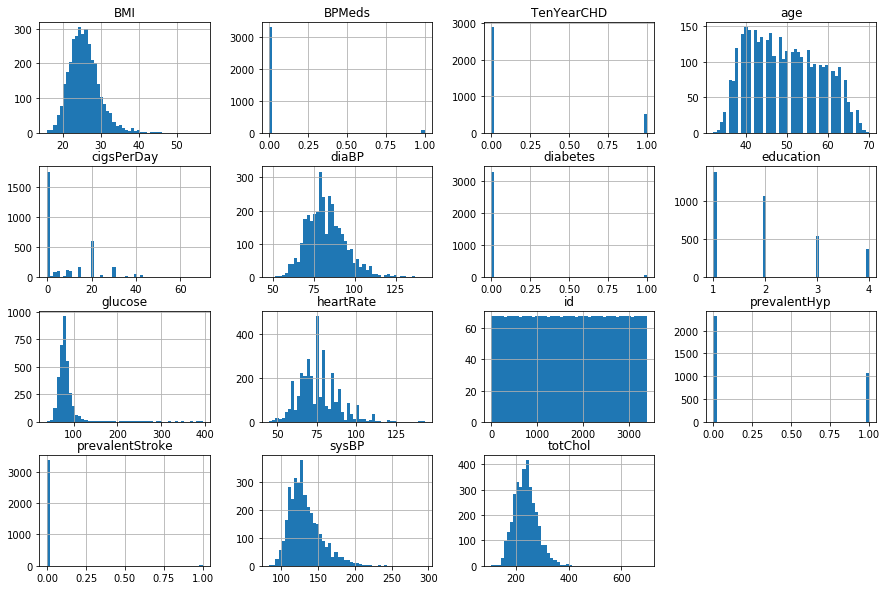

In [191]:
#Chart - 1
#With histogram plot, we can look at the sort of data we are working with. 
#We can only plot histograms for numerical attributes.
data.hist(bins = 50, figsize = (15,10))

* From the distribution we see that most of the columns are normally distributed.

##### From the dataset, visualizing TenYearCHD column with respect to other columns

0    2879
1     511
Name: TenYearCHD, dtype: int64


([<matplotlib.patches.Wedge at 0x7f8833b935f8>,
 [Text(-1.0469468875107146, -0.3374940217716862, 'Not CHD(%)'),
  Text(1.2373008670581171, 0.3988565711847199, 'CHD(%)')],
 [Text(-0.5710619386422079, -0.18408764823910154, '84.9%'),
  Text(0.7614159181896105, 0.24545019765213533, '15.1%')])

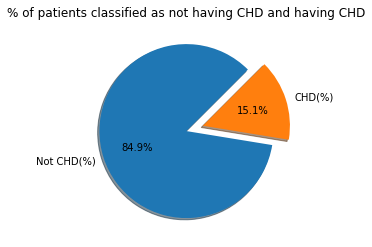

In [192]:
# chart 1 : visualizing TenYearCHD column
plt.title("% of patients classified as not having CHD and having CHD")
print(data['TenYearCHD'].value_counts())
plt.pie(data['TenYearCHD'].value_counts(), labels = ['Not CHD(%)', 'CHD(%)'], autopct="%1.1f%%", explode = [0,0.2], shadow = True, startangle = 45)


* From the above pie chart, 15.1% that is 511 out of 3390 are classified as positive for 10 year CHD whereas the remaining 84.9% that is 2879 out of 3390 are classified as negative for 10 year CHD.

  sex  TenYearCHD
0   F         239
1   M         272


([<matplotlib.patches.Wedge at 0x7f8833797198>,
 [Text(-0.6950517137399119, 0.852586133611855, 'F'),
  Text(0.6950517137399118, -0.852586133611855, 'M')],
 [Text(-0.3791191165854065, 0.46504698197010264, '46.8%'),
  Text(0.37911911658540637, -0.46504698197010264, '53.2%')])

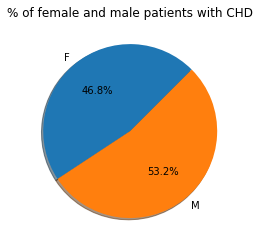

In [193]:
#chart 2 : Demographic wise vislization
#Counting out of 511 How many are Female and male?
TenYearCHD_sex = data[['sex', 'TenYearCHD']]
grouped_TenYearCHD_sex = TenYearCHD_sex.groupby(['sex'],as_index=False).sum()
print(grouped_TenYearCHD_sex)

plt.title("% of female and male patients with CHD")
plt.pie(grouped_TenYearCHD_sex['TenYearCHD'], labels = data['sex'].unique(), autopct="%1.1f%%", explode = [0,0], shadow = True, startangle = 45)

* From the above pie chart, out of 511, 239(46.8%) Female remaining 272(53.2%) patients with CHD.
* Therefore, percentage of female and male CHD is almost equal.

In [194]:
data['sex'].replace(['F','M'],[0,1], inplace=True)

  is_smoking  TenYearCHD
0         NO         236
1        YES         275


([<matplotlib.patches.Wedge at 0x7f8833751710>,
 [Text(-0.6792094476694984, 0.8652598027162102, 'NO'),
  Text(0.6977332584759727, -0.8888578626622493, 'YES')],
 [Text(-0.3704778805469991, 0.47195989239066005, '46.2%'),
  Text(0.3890017281768696, -0.4955579234311654, '53.8%')])

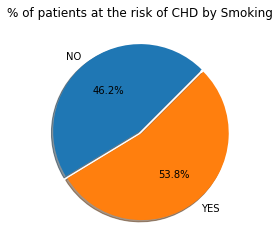

In [195]:
##chart 3 : Behavioral wise vislization
#Counting out of 511, How many are smokers and non-smokers?
smoking_to_CHD = data[['is_smoking', 'TenYearCHD']]

grouped_smoking_to_CHD = smoking_to_CHD.groupby(['is_smoking'],as_index=False).sum()
print(grouped_smoking_to_CHD)

plt.title("% of patients at the risk of CHD by Smoking")
plt.pie(grouped_smoking_to_CHD['TenYearCHD'], labels = grouped_smoking_to_CHD['is_smoking'].unique(), autopct="%1.1f%%", explode = [0,0.03], shadow = True, startangle = 45)

* From the above pie chart, 53.8% people who smokes are classified as CHD and 46.2% who don't smokes are also classifed as CHD. 

In [196]:
#smoking_to_CHD = data[['is_smoking', 'TenYearCHD']]
#filtered_data_YES = smoking_to_CHD[(smoking_to_CHD['is_smoking'] == 'YES') & (smoking_to_CHD['TenYearCHD'] == 1)]
#filtered_data_YES_df = filtered_data_YES.value_counts().reset_index()
#filtered_data_YES_df.columns = ['is_smoking', 'TenYearCHD','count']
#filtered_data_YES_df

In [197]:
data['is_smoking'].replace(['NO','YES'],[0,1], inplace=True)

* Let's drop id and education as there is no significance to CHD. 

In [198]:
data = data.drop(['id', 'education'], axis=1)

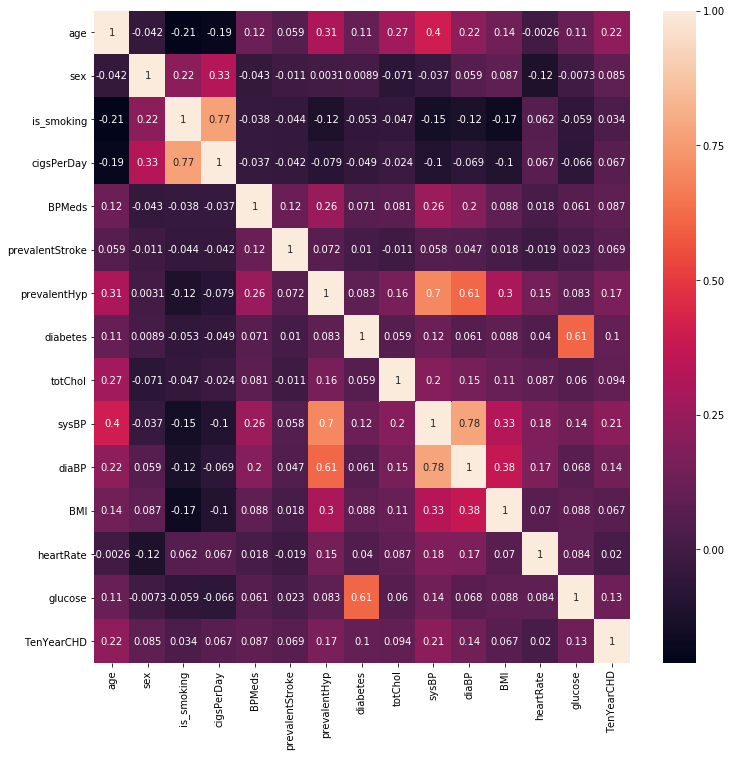

In [199]:
# chart 4 : correlation chart
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)

Text(0.5, 1.0, 'Age vs Ten-Year CHD')

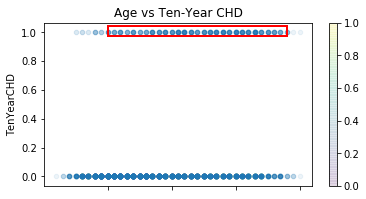

In [200]:
# chart 5 : visualizing CHD with respect to age.
ax = data.plot(kind="scatter", x="age", y="TenYearCHD", figsize=(6,3), cmap=plt.get_cmap(), alpha=0.08)
box = Rectangle((68, 0.97), 40-68, 1.04-0.97, fill=False, edgecolor='red', linewidth=2)
ax.add_patch(box)
plt.title("Age vs Ten-Year CHD")

* According to the above scatter plot, People's ages range from 30 to 70 as per the dataset but the majority of CHD cases are found in adults between the ages of 40 and 65. To be more precise, the average age of CHD cases is 55.

In [201]:
# chart 6 : Medical (history) wise vislization
group_plt = data[['BPMeds', 'prevalentStroke','prevalentHyp', 'diabetes', 'TenYearCHD']] 

for i in group_plt:
    result = group_plt[i].value_counts()
    print(result)

# counting number of people who have CHDs based on their medical histories
plt_ready= group_plt.groupby(['TenYearCHD'],as_index=False).sum()
plt_ready

0.0    3290
1.0     100
Name: BPMeds, dtype: int64
0    3368
1      22
Name: prevalentStroke, dtype: int64
0    2321
1    1069
Name: prevalentHyp, dtype: int64
0    3303
1      87
Name: diabetes, dtype: int64
0    2879
1     511
Name: TenYearCHD, dtype: int64


,TenYearCHD,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,0,67.0,12,814,54
1,1,33.0,10,255,33


* According to the data above, 100 out of 3390 people have BP and 33 of those 100 people are classified as having a CHD. 
* 10 of the 22 persons with prevalent stroke also have CHD. 
* 1069 out of 3390 patients have prevalent hypertension; of them, 255 are classified as having coronary heart disease (CHD).

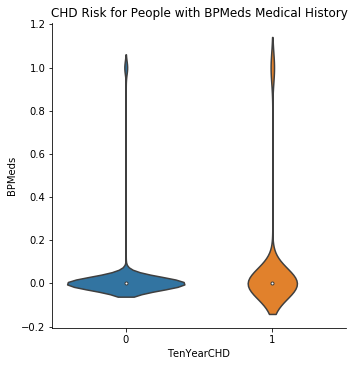

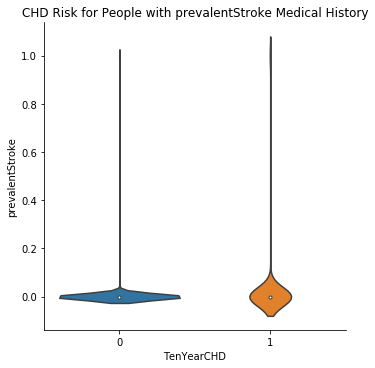

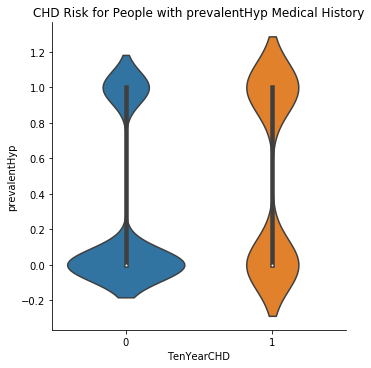

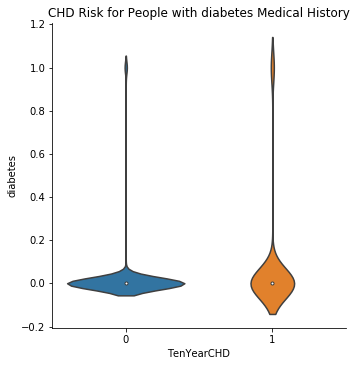

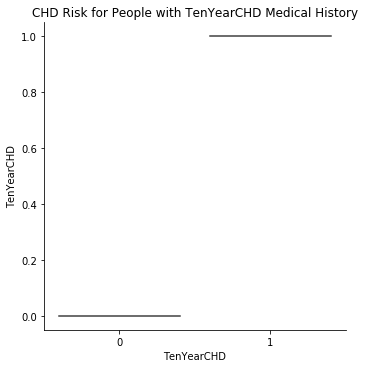

In [202]:
for i in group_plt:
 
  sns.catplot(x='TenYearCHD',y=i,data = group_plt, kind='violin')
  plt.ylabel(i)
  plt.xlabel('TenYearCHD')
  plt.title("CHD Risk for People with " + i + " Medical History")
  plt.show()

* According to the patients' medical histories, the curves in the above plot denote a high or low risk of CHD. Ignore last chart.
* The risk of CHD for people with BP is low compared to prevalent hypertension, almost equal to people with diabetes medical histories, but higher than prevalent stroke.
* In contrast to other medical histories, more people have prevalent hypertension and a high risk of coronary heart disease, whereas fewer people have prevalent strokes and a low risk of CHD. This can be due to limited information.

In [203]:
#Viewing the Current Medical Recode:

group_plt_a = data[['totChol','sysBP','diaBP','BMI','heartRate','glucose', 'TenYearCHD']] 
group_plt_a

,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,241.0,136.5,85.0,26.420000,70.0,77.0,0
...,...,...,...,...,...,...,...
3385,261.0,123.5,79.0,29.280000,70.0,103.0,0
3386,199.0,102.0,56.0,21.960000,80.0,84.0,0
3387,352.0,164.0,119.0,28.920000,73.0,72.0,1
3388,191.0,167.0,105.0,23.010000,80.0,85.0,0


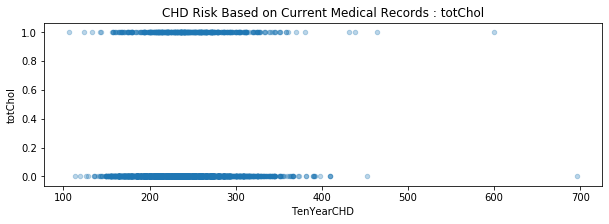

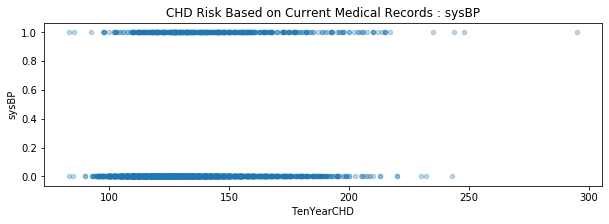

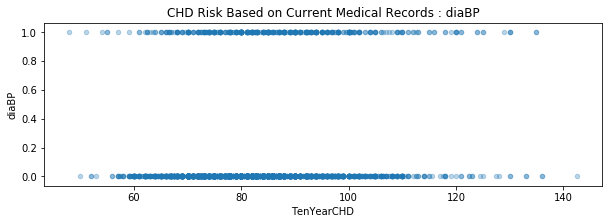

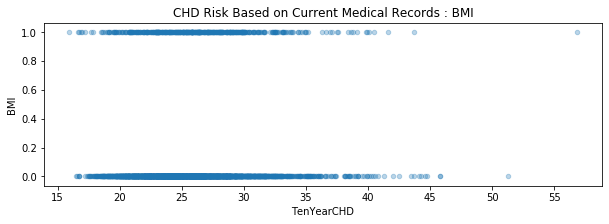

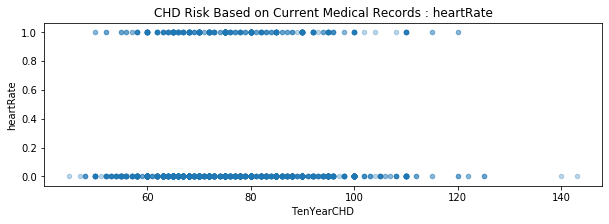

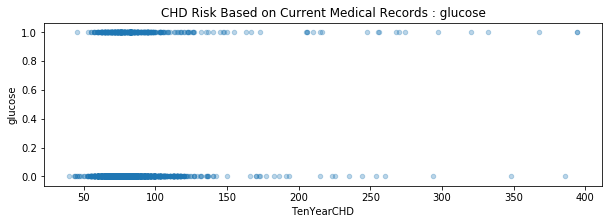

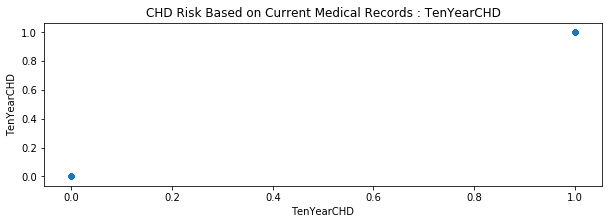

In [204]:
# chart 7 : visualizing the Current Medical Record
for i in group_plt_a:
    ax = group_plt_a.plot(kind="scatter", x=i, y="TenYearCHD", figsize=(10,3), alpha=0.3)
    plt.ylabel(i)
    plt.xlabel('TenYearCHD')
    plt.title("CHD Risk Based on Current Medical Records : " + i)
    plt.show()

* According to the above scatter plots, dense line formed on upper position of scatter plot indicates risk of CHD.  
* The risk of CHD cases are found in people with total cholesterol level between 150 and 310.
* People with systolic blood pressure between 110 and 158 comprise the majority of CHD patients.
* People with diastolic blood pressure between 70 and 110 comprise the majority of CHD patients.
* People with a Body Mass Index of 19 to 33 are reported to have the majority of CHD instances.
* People with a heart rate between 60 and 100 had the highest rate of CHD cases.
* People with glucose levels between 50 and 130 are the ones that have the bulk of CHD instances.


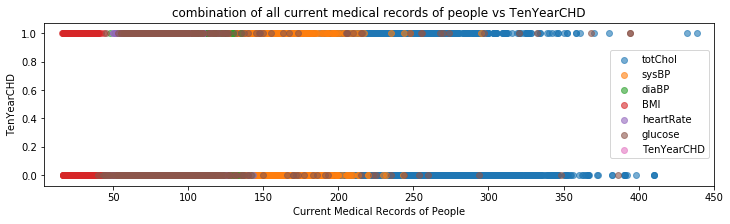

In [205]:
# chart 8 : combined all current medical records of people vs TenYearCHD

fig, ax = plt.subplots(figsize=(12, 3))
for i in group_plt_a:
    plt.scatter(group_plt_a[i], data['TenYearCHD'] , alpha=0.6)
ax.set_xlim(4,450)
ax.legend(group_plt_a.keys())
ax.set_ylabel ("TenYearCHD")
ax.set_xlabel ("Current Medical Records of People")
plt.title("combination of all current medical records of people vs TenYearCHD")
plt.show()

* The above plot is the combination of all current medical records of people vs TenYearCHD. 
* From the plot, you have observed that individuals with high values for total cholesterol level, systolic blood pressure, glucose levels, and BMI tend to have a higher likelihood of Coronary Heart Disease (CHD). On the other hand, lower values of diastolic blood pressure and heart rate seem to be less likely to be associated with CHD.

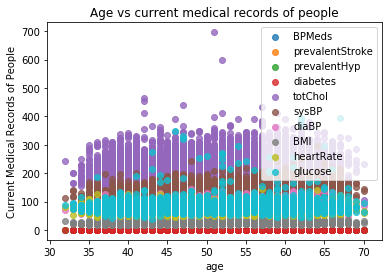

In [206]:
# chart 9 : Age vs current medical records of people
group_plt_age = data[['BPMeds', 'prevalentStroke','prevalentHyp', 'diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

fig, ax = plt.subplots()
for i in group_plt_age:
    plt.scatter( data['age'], group_plt_age[i], alpha=0.8)
#ax.set_xlim(4,450)
ax.legend(group_plt_age.keys())
ax.set_xlabel ("age")
ax.set_ylabel ("Current Medical Records of People")
plt.title("Age vs current medical records of people")
plt.show()


In [207]:
#from pandas.plotting import scatter_matrix

#scatter_matrix( data.corr(), figsize=(12, 12))

In [208]:

data.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


## Data Splitting 

In [209]:
X = data.drop("TenYearCHD", axis=1) # feature
y = data['TenYearCHD'].copy() # Label

In [210]:
print(X)
print(y)

      age  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0      64    0           1         3.0     0.0                0             0   
1      36    1           0         0.0     0.0                0             1   
2      46    0           1        10.0     0.0                0             0   
3      50    1           1        20.0     0.0                0             1   
4      64    0           1        30.0     0.0                0             0   
...   ...  ...         ...         ...     ...              ...           ...   
3385   60    0           0         0.0     0.0                0             0   
3386   46    0           0         0.0     0.0                0             0   
3387   44    1           1         3.0     0.0                0             1   
3388   60    1           0         0.0     0.0                0             1   
3389   54    0           0         0.0     0.0                0             0   

      diabetes  totChol  sy

In [211]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=42)

## Feature Scaling

In [212]:
scaler = StandardScaler()

train_set = scaler.fit_transform(X_train)
test_set = scaler.transform(X_test)

In [213]:
model_log = LogisticRegression()
model_log_fit = model_log.fit(train_set, y_train)

In [214]:
y_test_pre1 = model_log_fit.predict(test_set)

In [215]:
outcome = pd.DataFrame(y_test_pre1)
outcome[0].value_counts()

0    833
1     15
Name: 0, dtype: int64

In [216]:
model_log_fit.score(test_set, y_test_pre1)

1.0

In [217]:
proba = model_log_fit.predict_proba(test_set)
proba

array([[0.60361068, 0.39638932],
       [0.89717557, 0.10282443],
       [0.70397831, 0.29602169],
       ...,
       [0.90372134, 0.09627866],
       [0.89837045, 0.10162955],
       [0.79441013, 0.20558987]])

In [218]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pre1))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       718
           1       0.80      0.09      0.17       130

    accuracy                           0.86       848
   macro avg       0.83      0.54      0.54       848
weighted avg       0.85      0.86      0.81       848



In [219]:
roc_auc1 = auc(fpr1, tpr1)

In [220]:
print("ROC-AUC:", roc_auc1)

ROC-AUC: 0.7368009427898008


In [221]:
class_names = ['Not CHD', 'CHD']

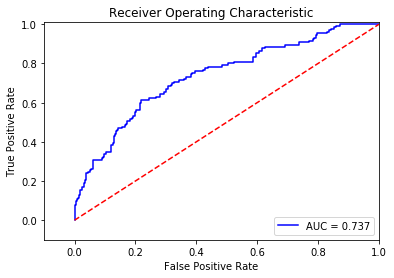

In [222]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b',label='AUC = %0.3f'% roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()